In [3]:
"""
CV4E Project 1: Preparing Data for Machine Learning

This project is a first iteration of preparing data for use in a ResNet machine learning model.
The data are in the form of a .json file, which were downloaded from BIIGLE and located in the following folder:
/Users/talenrimmer/Desktop/CV4E_Code/data/21209-lazo-1-2024-05-22.json

The goals of this project are to:
- Teach a whole-image classifier to identify images that contain a specific class (forage fish)
(If the above is successful, then):
a) quantify forage fish into a density estimate (small, medium, large schools)
b) identify species of forage fish

"""

'\nCV4E Project 1: Preparing Data for Machine Learning\n\nThis project is a first iteration of preparing data for use in a ResNet machine learning model.\nThe data are in the form of a .json file, which were downloaded from BIIGLE and located in the following folder:\n/Users/talenrimmer/Desktop/CV4E_Code/data/21209-lazo-1-2024-05-22.json\n\nThe goals of this project are to:\n- Teach a whole-image classifier to identify images that contain a specific class (forage fish)\n(If the above is successful, then):\na) quantify forage fish into a density estimate (small, medium, large schools)\nb) identify species of forage fish\n\n'

In [4]:
# Import json lbrary and load in the json file from my local directory 
import json
with open("/Users/talenrimmer/Desktop/CV4E_Code/data/21209-lazo-1-2024-05-22.json",'r') as file:
    data = json.load(file)

    # Print the JSON structure
### print(json.dumps(data["annotations"], indent=4))

In [5]:
# The .json file has the data in the form of a dictionary, so I will print each key (images, annotations, and categories), and define all three in a pandas dataframe:

import pandas as pd

imagedf = pd.DataFrame(data["images"])

annotationsdf = pd.DataFrame(data["annotations"])

categoriesdf = pd.DataFrame(data["categories"])

# Print the first 5 rows of each dataframe to see what the data looks like
categoriesdf.sample(5)
#And the number of columns:
annotationsdf.columns

# Rename the columns in each dataframe so they all represent their id
categoriesdf.rename(columns={'id': 'category_id'}, inplace=True)

annotationsdf.rename(columns={'id': 'annotations_id'}, inplace=True)

imagedf.rename(columns={'id': 'image_id'}, inplace=True)


In [6]:
# Now I will merge the image and annotations dataframes together to create one dataframe that contains all the data
merged_df = pd.merge(annotationsdf, imagedf, on='image_id', how='outer')
# merged_df.sample(5)



In [7]:
# Check unique image_id counts in each DataFrame
annotations_count = annotationsdf['image_id'].nunique()
images_count = imagedf['image_id'].nunique()
merged_count = merged_df['image_id'].nunique()

print(f"Unique image_id in annotationsdf: {annotations_count}")
print(f"Unique image_id in imagedf: {images_count}")
print(f"Unique image_id in merged_df: {merged_count}")

# Verify all rows are retained
annotations_rows = len(annotationsdf)
images_rows = len(imagedf)
merged_rows = len(merged_df)

print(f"Rows in annotationsdf: {annotations_rows}")
print(f"Rows in imagedf: {images_rows}")
print(f"Rows in merged_df: {merged_rows}")

# Check for missing values in image_id column
missing_image_ids = merged_df['image_id'].isna().sum()
print(f"Missing image_id rows in merged_df: {missing_image_ids}")


Unique image_id in annotationsdf: 176
Unique image_id in imagedf: 176
Unique image_id in merged_df: 176
Rows in annotationsdf: 22390
Rows in imagedf: 176
Rows in merged_df: 22390
Missing image_id rows in merged_df: 0


In [8]:
# Merging all rows and images by image_id:
all_images = pd.merge(imagedf, annotationsdf,
         how = 'outer', on = 'image_id')

all_images.sample(5)

,height,width,image_id,file_name,longitude,latitude,segmentation,iscrowd,area,bbox,category_id,annotations_id
3526,4872,5568,5992503,GOPR1514.JPG,None,None,"[[1060.1874999999952, 2756.600000000001, 1059....",0,4864.582696,"[954.3911444413884, 2751.2937705018244, 106.02...",420073,42193589
16270,4872,5568,5993932,GOPR2943.JPG,None,None,"[[3892.512499999996, 2701.669999999999, 3892.2...",0,3029.221620,"[3786.6325000000224, 2686.710024461658, 105.87...",420108,41674542
18859,4872,5568,5994176,GOPR3187.JPG,None,None,"[[2582.70000000002, 400.73999999999705, 2584.1...",0,6647.652213,"[2519.6304050112158, 303.10984172026247, 67.37...",420073,42274308
4552,4872,5568,5992802,GOPR1813.JPG,None,None,"[[1606.0325, 1201.7875000000013, 1607.40043556...",0,7532.627785,"[1520.8281805081656, 1119.7750272928683, 88.18...",420108,42195298
890,4872,5568,5992042,GOPR1053.JPG,None,None,"[[2617.86250000001, 1541.5499999999897, 2614.5...",0,8556.758946,"[2578.8923524590787, 1541.5499999999897, 67.61...",420073,41628946


In [9]:
#Time to check for any NA values!

# Check for NA values in the 'name' column
na_values = all_images['annotations_id'].isna()

# Display rows where 'name' column has NA values
missing_values = all_images[na_values]

print(missing_values)

Empty DataFrame
Columns: [height, width, image_id, file_name, longitude, latitude, segmentation, iscrowd, area, bbox, category_id, annotations_id]
Index: []


In [10]:
# Merging annotations and images by image_id:

annotations_images = pd.merge(annotationsdf, imagedf,
         how = 'left', on = 'image_id')

merged_df = pd.merge(annotations_images, categoriesdf,
         how = 'left', on = "category_id")

merged_df.sample(5)

,segmentation,iscrowd,area,image_id,bbox,category_id,annotations_id,height,width,file_name,longitude,latitude,name
12905,"[[5373.05000000001, 2574.170000000001, 5372.47...",0,8532.777009,5993319,"[5163.110000000022, 2557.468057994511, 209.939...",420108,42203400,4872,5568,GOPR2330.JPG,None,None,Sch. C. Pallasii
20701,"[[3107.539999999995, 3533.4200000000046, 3107....",0,4485.770689,5993650,"[2998.819999999991, 3513.750075932656, 108.720...",420108,42267815,4872,5568,GOPR2661.JPG,None,None,Sch. C. Pallasii
8777,"[[4807.712500000013, 1605.0100000000002, 4805....",0,17940.195349,5992802,"[4700.975303200083, 1603.8800926163522, 110.95...",420108,42195776,4872,5568,GOPR1813.JPG,None,None,Sch. C. Pallasii
9831,"[[4685.110000000065, 1781.1700000000014, 4684....",0,6263.765489,5992901,"[4534.67000000002, 1761.761848281447, 150.4400...",420108,42198101,4872,5568,GOPR1912.JPG,None,None,Sch. C. Pallasii
5120,"[[1219.497499999999, 715.5999999999995, 1218.3...",0,12835.079666,5993932,"[1056.3610009555023, 693.1301068873881, 163.46...",420108,41667648,4872,5568,GOPR2943.JPG,None,None,Sch. C. Pallasii


In [11]:
# subsetting data such that we just see the IDs, the file name, and the name of the animal
shortened_df = merged_df[["image_id", "category_id", "annotations_id", "file_name", "name"]]
# min_df = merged_df[["annotations_id", "file_name", "name"]]

shortened_df

,image_id,category_id,annotations_id,file_name,name
0,5991860,420073,41626886,GOPR0871.JPG,Forage Fish
1,5991860,420073,41626887,GOPR0871.JPG,Forage Fish
2,5991860,420073,41626888,GOPR0871.JPG,Forage Fish
3,5991860,420073,41626889,GOPR0871.JPG,Forage Fish
4,5991860,420073,41626890,GOPR0871.JPG,Forage Fish
...,...,...,...,...,...
22385,5993221,420073,42296873,GOPR2232.JPG,Forage Fish
22386,5993221,420073,42296874,GOPR2232.JPG,Forage Fish
22387,5993221,420073,42296876,GOPR2232.JPG,Forage Fish
22388,5993221,420073,42296877,GOPR2232.JPG,Forage Fish


In [12]:
# Define the list of names to mark as True
forage_fish_names = [
    'Forage Fish',
    'Sch. A. personatus',
    'Ex. C. Pallasii',
    'Sch. C. Pallasii',
    'Ex. C. aggregata',
    'Sch. C. aggregata',
    'A. personatus (Pacific Sand Lance)',
    'Ex. A. personatus'
]

# Create a new column 'forage fish' with True/False values based on the condition
shortened_df['is_forage_fish'] = shortened_df['name'].isin(forage_fish_names)

shortened_df.sample(5)


/var/folders/bh/fk66vry957b2pddbb9fjfqqr0000gn/T/ipykernel_9515/3696272625.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shortened_df['is_forage_fish'] = shortened_df['name'].isin(forage_fish_names)


,image_id,category_id,annotations_id,file_name,name,is_forage_fish
16757,5994259,420108,42242748,GOPR3270.JPG,Sch. C. Pallasii,True
18560,5994259,420108,42263581,GOPR3270.JPG,Sch. C. Pallasii,True
252,5992013,420073,41627377,GOPR1024.JPG,Forage Fish,True
8993,5992901,420108,42196000,GOPR1912.JPG,Sch. C. Pallasii,True
16010,5993412,420108,42240796,GOPR2423.JPG,Sch. C. Pallasii,True


In [13]:

#and then remove rows that contain the file_name values "GOPR3002.JPG" and "GOPR3270.JPG". These contain images that have annotations of both non-forage fish and forage fish, which we don't want.
# It would be an issue because we're classifying the images as a whole, not the individual annotations.
shortened_df = shortened_df[~shortened_df['file_name'].isin(['GOPR3002.JPG', 'GOPR3270.JPG'])]

#Now query the dataframe to make sure the rows have been removed (return false if the rows are still present):
assert not shortened_df['file_name'].isin(['GOPR3002.JPG', 'GOPR3270.JPG']).any()

#Remove rows with a specific image_id value (these are removed because they contain erronous images)
shortened_df = shortened_df[~shortened_df['image_id'].isin(['5993725', '5992343'])]
#Now query the dataframe to make sure the rows have been removed (return false if the rows are still present):
assert not shortened_df['image_id'].isin(['5993725', '5992343']).any()

shortened_df.sample(10)

# #Creating a list of value counts for each name
# histogram = min_df['name'].value_counts()

# histogram

,image_id,category_id,annotations_id,file_name,name,is_forage_fish
15491,5993319,420108,42240224,GOPR2330.JPG,Sch. C. Pallasii,True
2132,5993716,420073,41648708,GOPR2727.JPG,Forage Fish,True
130,5991860,420073,41627102,GOPR0871.JPG,Forage Fish,True
20116,5993192,420073,42266162,GOPR2203.JPG,Forage Fish,True
1428,5992482,420119,41646715,GOPR1493.JPG,Sch. A. personatus,True
2129,5993716,420073,41648705,GOPR2727.JPG,Forage Fish,True
18758,5993273,420073,42264049,GOPR2284.JPG,Forage Fish,True
12545,5994146,420108,42202871,GOPR3157.JPG,Sch. C. Pallasii,True
7933,5992503,420073,42193659,GOPR1514.JPG,Forage Fish,True
104,5991860,420073,41627075,GOPR0871.JPG,Forage Fish,True


In [14]:
# # Now we plot a historgram of the 'is_forage_fish' column to see the distribution of True and False values

# import matplotlib.pyplot as plt
# # Count the occurrences of True and False in the 'forage fish' column
# counts = shortened_df['is_forage_fish'].value_counts()
# counts

# # Plot a histogram
# counts.plot(kind='bar')

# # Add labels and title
# plt.xlabel('Forage Fish (True or False)')
# plt.ylabel('Frequency')
# plt.title('Proportion of False vs True in Forage Fish Column')

# # Show the plot
# plt.show()


In [15]:
"""
This code chunk is Important! It checks for missing images in the images folder and adds them to the dataframe with some values.
This matters because up until this point, we've only had the images that were annotated in the dataset. We want to add all the images that we know also exist in the images folder, 
but that don't have the same name as the ones we already have. These new images will be our 'empty' images.

"""

import os
import pandas as pd

# First we find the images from the images folder
for image in os.listdir('/Users/talenrimmer/Desktop/CV4E_Code/images'):
    image_without_ext = image.replace('.jpg', '') # remove the file extension from the image name
    image_without_ext = int(image_without_ext)
    # print(image_without_ext)
    # print(type(image_without_ext))
    # print(type(shortened_df['image_id'].values[0]))
    if not image_without_ext in shortened_df['image_id'].values: #this says 'if the image id is not in the dataframe'
        #add it as a row to an object with columns that are the same as the dataframe:
        new_row = {'image_id': image_without_ext, 'category_id': 'NaN', 'annotations_id': 'NaN', 'file_name': 'NaN', 'name': 'Empty', 'is_forage_fish': False}
        new_row = pd.DataFrame(new_row, index=[0]) #and call the new object a pandas dataframe
    # else: 
    #     print('False')
    # add new row to dataframe
        shortened_df = pd.concat([shortened_df, new_row], ignore_index=True) # Now we add the newly created dataframe to the old dataframe!

     #now we view to make sure we have both 'true' and 'false' values for the 'is_forage_fish' column, to make sure the new rows were added correctly: 
shortened_df



,image_id,category_id,annotations_id,file_name,name,is_forage_fish
0,5991860,420073,41626886,GOPR0871.JPG,Forage Fish,True
1,5991860,420073,41626887,GOPR0871.JPG,Forage Fish,True
2,5991860,420073,41626888,GOPR0871.JPG,Forage Fish,True
3,5991860,420073,41626889,GOPR0871.JPG,Forage Fish,True
4,5991860,420073,41626890,GOPR0871.JPG,Forage Fish,True
...,...,...,...,...,...,...
23104,5992096,NaN,NaN,NaN,Empty,False
23105,5992082,NaN,NaN,NaN,Empty,False
23106,5994395,NaN,NaN,NaN,Empty,False
23107,5992914,NaN,NaN,NaN,Empty,False


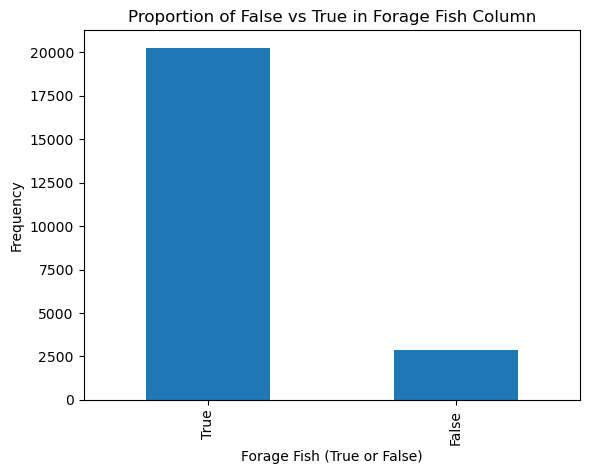

In [16]:
#Now we check our overall false vs true values in the 'is_forage_fish' column:
import matplotlib.pyplot as plt
# Count the occurrences of True and False in the 'forage fish' column
counts = shortened_df['is_forage_fish'].value_counts()
counts

# Plot a histogram
counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Forage Fish (True or False)')
plt.ylabel('Frequency')
plt.title('Proportion of False vs True in Forage Fish Column')

# Show the plot
plt.show()

In [17]:
# #Creating a list of value counts for each name
histogram = shortened_df['name'].value_counts()

histogram
# So we can see that there are >2700 empty images in dataset

name
Sch. C. Pallasii      10377
Forage Fish            6539
Sch. A. personatus     2925
Empty                  2706
Ex. C. Pallasii         356
Actinopterygii          142
Ex. A. personatus        64
Name: count, dtype: int64

In [18]:
"""
This code chunk is important! It adds a new column to the dataframe that is a numerical representation of the 'is_forage_fish' column.

"""

# Now we make a new column called 'forage_num' that will be 1 if the animal is a forage fish and 0 if it is not
shortened_df['forage_num'] = shortened_df['is_forage_fish'].astype(int) #this converts the boolean values to integers

# saving shortened_df to a .csv file
shortened_df.to_csv('shortened_df.csv')

# Now we sum all the values in the 'forage_num' column to get the total number of forage fish for each image_id. 
forage_fish_counts = shortened_df.groupby('image_id')['forage_num'].sum()

#and we make this a pandas dataframe:
forage_fish_counts = pd.DataFrame(forage_fish_counts)

# now we view the 5 max values of the forage fish counts:
# forage_fish_counts.nlargest(20)

# now we export the dataframe as a .csv file:
forage_fish_counts.to_csv('forage_fish_counts.csv')

#and now we add this to our shortened_df
# shortened_df = pd.merge(shortened_df, forage_fish_counts, on='image_id')
# shortened_df.sample(10)

<Axes: xlabel='forage_num'>

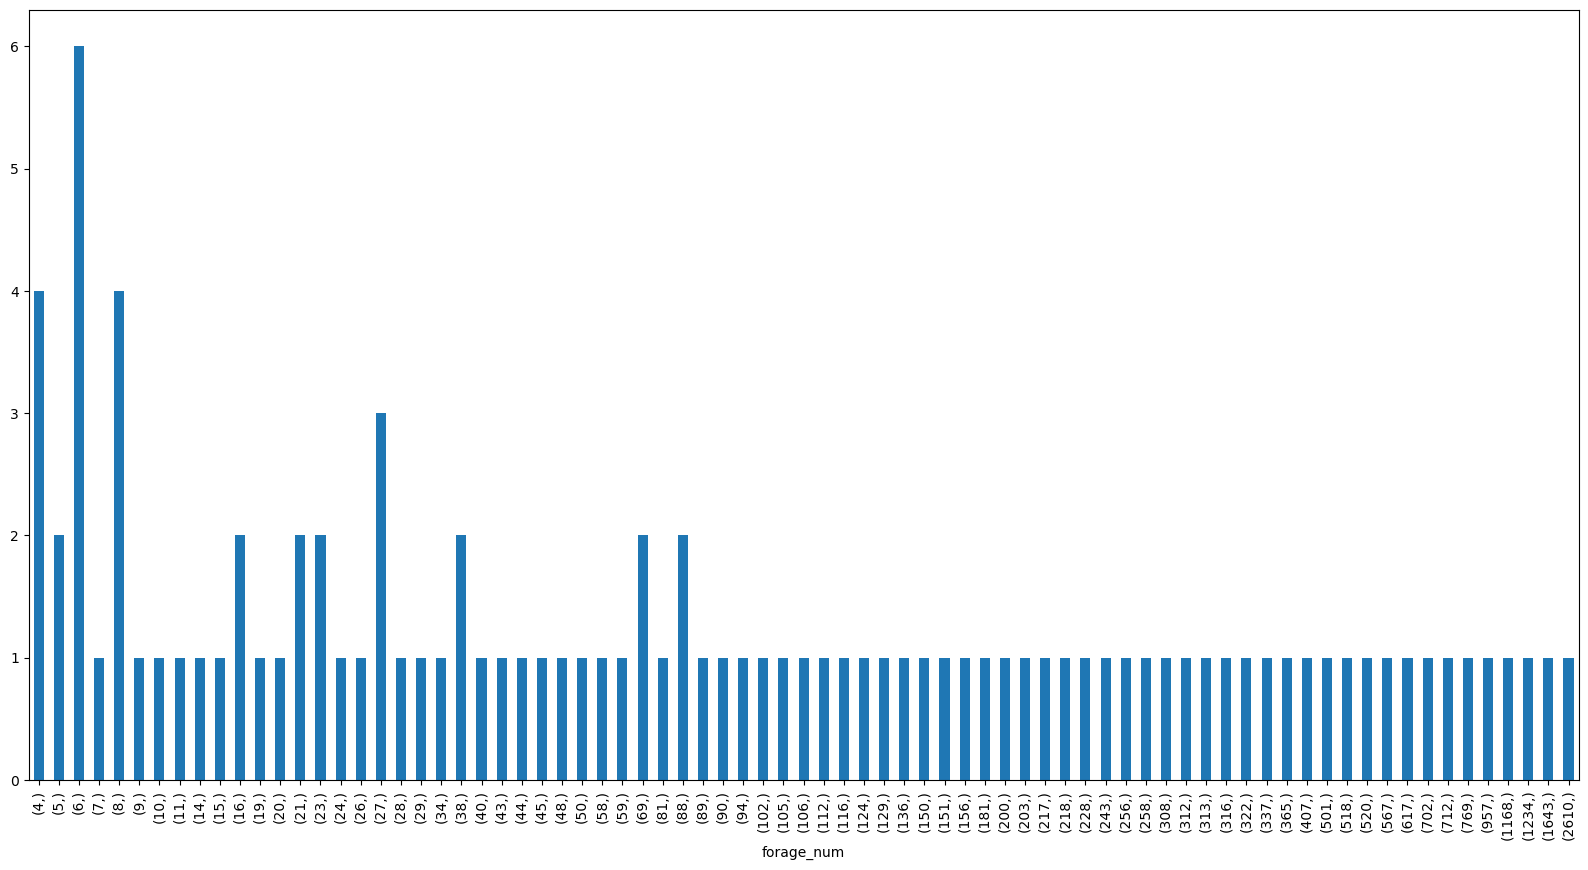

In [19]:
# # Here we can Visualize the distribution of forage_num in the dataset, plotting the value counts of forage_num 
# that are not 0 and sorting from smallest to largest schools:
test = forage_fish_counts[forage_fish_counts['forage_num']!=0].value_counts().sort_index().plot(kind='bar', figsize=(20,10))
test
# we can see that our largest school size is 2610, and our smallest is 4 fish


In [20]:
#Now lets visualize our largest school size:
forage_fish_counts[forage_fish_counts['forage_num']>2000] #this shows us the largest school size

shortened_df[shortened_df['image_id']==5993932]["file_name"] #this shows us the file name of the image with the largest school size

4797     GOPR2943.JPG
4798     GOPR2943.JPG
4799     GOPR2943.JPG
4802     GOPR2943.JPG
4803     GOPR2943.JPG
             ...     
12443    GOPR2943.JPG
12444    GOPR2943.JPG
12445    GOPR2943.JPG
12446    GOPR2943.JPG
12447    GOPR2943.JPG
Name: file_name, Length: 2610, dtype: object

In [21]:
#Now we look at the image with the most forage fish:
from IPython.display import Image, display

#The code below calls on the image with the largest school. BUT IMPORTANT: do NOT sync with github if you run this code, as the image is too large to upload to github.

# display(Image(filename='/Users/talenrimmer/Desktop/CV4E_Code/images/5993932.jpg'))

In [22]:
#we also want to check the number of images that are not empty
num_no0 = forage_fish_counts[forage_fish_counts['forage_num']!=0]

# ["image_id"]
# test
# for imagename in test:
#     print(imagename)
num_no0

,forage_num
image_id,
5991727,34
5991860,156
5991895,29
5991896,14
5991897,21
...,...
5994225,337
5994298,256
5994300,116


In [23]:
"""
Based on the above, we saw there are some images that contained very few forage fish that I'd like to inspect. 
So, we're going to find the file names for those images
"""
# Now we're subsetting the data for just rows that contain values of forage_num <30 and >0:
forage_fish_counts_30 = forage_fish_counts[forage_fish_counts['forage_num']<30]

forage_fish_counts_30 = forage_fish_counts_30[forage_fish_counts_30['forage_num']>0]
forage_fish_counts_30

#Now we're going to find all the rows in shortened_df that contain the image_id values in forage_fish_counts_30:
shortened_df_30 = shortened_df[shortened_df['image_id'].isin(forage_fish_counts_30.index)]
shortened_df_30

,image_id,category_id,annotations_id,file_name,name,is_forage_fish,forage_num
9,5991895,420073,41626942,GOPR0906.JPG,Forage Fish,True,1
10,5991895,420073,41626943,GOPR0906.JPG,Forage Fish,True,1
11,5991895,420073,41626944,GOPR0906.JPG,Forage Fish,True,1
12,5991895,420073,41626945,GOPR0906.JPG,Forage Fish,True,1
13,5991895,420073,41626946,GOPR0906.JPG,Forage Fish,True,1
...,...,...,...,...,...,...,...
20398,5993221,420073,42296873,GOPR2232.JPG,Forage Fish,True,1
20399,5993221,420073,42296874,GOPR2232.JPG,Forage Fish,True,1
20400,5993221,420073,42296876,GOPR2232.JPG,Forage Fish,True,1
20401,5993221,420073,42296877,GOPR2232.JPG,Forage Fish,True,1


In [24]:
# Now calculate number of images in forage_fish_counts that = True, and downsample the false to match:

# Now we calculate number of images in forage_fish_counts that have the value True
forage_fish_counts_true = forage_fish_counts[forage_fish_counts['forage_num']!=0]

# Now we remove the row that has the image_id 5992343, as it's erronous:
forage_fish_counts_true = forage_fish_counts_true[forage_fish_counts_true.index != 5992343]
forage_fish_counts_true
# Now we downsample the false values to match the number of true values:
forage_fish_counts_false = forage_fish_counts[forage_fish_counts['forage_num']==0].sample(n=len(forage_fish_counts_true))
forage_fish_counts_false

#Now we create a training dataset with 63 images from the forage_fish_counts_true and from the forage_fish_counts_false dataset, called "training_set"
training_set = pd.concat([forage_fish_counts_true, forage_fish_counts_false])

# Now we concatenate the two dataframes:
# forage_fish_counts_ds = pd.concat([forage_fish_counts_true, forage_fish_counts_false])
# forage_fish_counts_ds





In [25]:
#checking rows of forage fish in true:
forage_fish_counts_true

,forage_num
image_id,
5991727,34
5991860,156
5991895,29
5991896,14
5991897,21
...,...
5994225,337
5994298,256
5994300,116


In [26]:
# checking rows of forage fish in false:
forage_fish_counts_false

,forage_num
image_id,
5994459,0
5994419,0
5992879,0
5993265,0
5994085,0
...,...
5994322,0
5993080,0
5993368,0


In [27]:
#Now we create a training, test, and val set from the forage_fish_counts_true and forage_fish_counts_false datasets:

from sklearn.model_selection import train_test_split

# Split the 'forage_fish_counts_true' dataframe
true_train, true_temp = train_test_split(forage_fish_counts_true, test_size=0.3, random_state=38)
true_val, true_test = train_test_split(true_temp, test_size=(1/3), random_state=38)

# Split the 'forage_fish_counts_false' dataframe
false_train, false_temp = train_test_split(forage_fish_counts_false, test_size=0.3, random_state=38)
false_val, false_test = train_test_split(false_temp, test_size=(1/3), random_state=38)

# Combine the corresponding splits from both datasets
# train = pd.concat([true_train, false_train])
# val = pd.concat([true_val, false_val])
# test = pd.concat([true_test, false_test])

# # Verify the sizes
# print(f"Train size: {len(train)}")
# print(f"Validation size: {len(val)}")
# print(f"Test size: {len(test)}")
import shutil
from pathlib import Path

# # creating lists for true train and other combinations (THIS WAS THE ORIGINAL CODE THAT WORKED:)
# #creating lists for each combination:
df_list = [[true_train, "train", "ff"],
[false_train, "train", "empty"],
[true_val, "val", "ff"],
[false_val, "val", "empty"],
[true_test, "test", "ff"],
[false_test, "test", "empty"]
]
# for df, split_type, class_type in df_list:

#     for image_id in df.index.tolist():
#         # shutil.copy(f'/Users/talenrimmer/Desktop/CV4E_Code/images/{image_id}.jpg', f'/Users/talenrimmer/Desktop/CV4E_Code/data_split/{split_type}/{class_type}')
#         #split type
#         #class 
#         src_img = f'/Users/talenrimmer/Desktop/CV4E_Code/images/{image_id}.jpg'
#         dst_img = f'/Users/talenrimmer/Desktop/CV4E_Code/data_split/{split_type}/{class_type}'
#         Path(dst_img).mkdir(parents=True, exist_ok=True) #Checking if the destination img folder exists, if not, create it (for each ff and empty folder)
#         shutil.copy(src_img, dst_img)

In [28]:
# now create a plot to view the total number of images in the training, validation, and test sets:
train_size = len(true_train) + len(false_train)
val_size = len(true_val) + len(false_val)
test_size = len(true_test) + len(false_test)
#now we print these three values:
print(f"Train size: {train_size}")
print(f"Validation size: {val_size}")
print(f"Test size: {test_size}")


# concatinate .jpg to the image_id column
# Looping through train, and add images that correspond to the image_id to a new folder (called train)
# Looping through val, and add images that correspond to the image_id to a new folder (called val)
# # Looping through test, and add images that correspond to the image_id to a new folder (called test)

# # make the train dataframe into a list
# train_list = train.index.tolist()
# val_list = val.index.tolist()
# test_list = test.index.tolist()

# import shutil

# # Looping through train, and add images that correspond to the image_id to a new folder (called train)
# for image_id in train_list:
#     shutil.copy(f'/Users/talenrimmer/Desktop/CV4E_Code/images/{image_id}.jpg', f'/Users/talenrimmer/Desktop/CV4E_Code/data_split/train/ff')
#     shutil.copy(f'/Users/talenrimmer/Desktop/CV4E_Code/images/{image_id}.jpg', f'/Users/talenrimmer/Desktop/CV4E_Code/data_split/train/empty')


# for image_id in val_list:
#     shutil.copy(f'/Users/talenrimmer/Desktop/CV4E_Code/images/{image_id}.jpg', f'/Users/talenrimmer/Desktop/CV4E_Code/data_split/val/ff')
#     shutil.copy(f'/Users/talenrimmer/Desktop/CV4E_Code/images/{image_id}.jpg', f'/Users/talenrimmer/Desktop/CV4E_Code/data_split/val/empty')

# for image_id in test_list:
#     shutil.copy(f'/Users/talenrimmer/Desktop/CV4E_Code/images/{image_id}.jpg', f'/Users/talenrimmer/Desktop/CV4E_Code/data_split/test/ff')
#     shutil.copy(f'/Users/talenrimmer/Desktop/CV4E_Code/images/{image_id}.jpg', f'/Users/talenrimmer/Desktop/CV4E_Code/data_split/test/empty')

Train size: 134
Validation size: 40
Test size: 20


In [29]:
train_data = {
    "info": {
        "description": "ff_test_data",
        "year": 2025,
        "contributor": "Talen",
        "date_created": "2025-01-10"
    },
    "images": [],
    "annotations": [],
    "categories": []
}


cis_val_data = {
    "info": {
        "description": "ff_test_data",
        "year": 2025,
        "contributor": "Talen",
        "date_created": "2025-01-10"
    },
    "images": [],
    "annotations": [],
    "categories": []
}


cis_test_data = {
    "info": {
        "description": "ff_test_data",
        "year": 2025,
        "contributor": "Talen",
        "date_created": "2025-01-10"
    },
    "images": [],
    "annotations": [],
    "categories": []
}

In [ ]:

# Train data:
for image_id in true_train.index.tolist():
    image = {
        "id": image_id,
        "file_name": f"{image_id}.jpg",
    }
    train_data["images"].append(image)
    
    annotation = {  
        "image_id": image_id,
        "category_id": 1
    }
    train_data["annotations"].append(annotation)
    
    category = {
        "id": 1,
        "name": "ff"
    }
    train_data["categories"].append(category)


for image_id in false_train.index.tolist():
    image = {
        "id": image_id,
        "file_name": f"{image_id}.jpg",
    }
    train_data["images"].append(image)
    
    annotation = {  
        "image_id": image_id,
        "category_id": 0
    }
    train_data["annotations"].append(annotation)
    
    category = {
        "id": 0,
        "name": "empty"
    }
    train_data["categories"].append(category)

# Now we save the "train_data" as a .json file called "train_annotations" to the local directory:
with open('train_annotations.json', 'w') as outfile:
    json.dump(train_data, outfile)



# with open('train_data.json', 'w') as outfile:
#     json.dump(train_data, outfile)



# Val data:
for image_id in true_val.index.tolist():
    image = {
        "id": image_id,
        "file_name": f"{image_id}.jpg",
    }
    cis_val_data["images"].append(image)
    
    annotation = {  
        "image_id": image_id,
        "category_id": 1
    }
    cis_val_data["annotations"].append(annotation)
    
    category = {
        "id": 1,
        "name": "ff"
    }
    cis_val_data["categories"].append(category)
    

for image_id in false_val.index.tolist():
    image = {
        "id": image_id,
        "file_name": f"{image_id}.jpg",
    }
    cis_val_data["images"].append(image)
    
    annotation = {  
        "image_id": image_id,
        "category_id": 0
    }
    cis_val_data["annotations"].append(annotation)
    
    category = {
        "id": 0,
        "name": "empty"
    }
    cis_val_data["categories"].append(category)

# Now we save the "cis_val_data" as a .json file called "cis_val_annotations" to the local directory:
with open('cis_val_annotations.json', 'w') as outfile:
    json.dump(cis_val_data, outfile)




# Test data:
for image_id in true_test.index.tolist():
    image = {
        "id": image_id,
        "file_name": f"{image_id}.jpg",
    }
    cis_test_data["images"].append(image)
    
    annotation = {  
        "image_id": image_id,
        "category_id": 1
    }
    cis_test_data["annotations"].append(annotation)
    
    category = {
        "id": 1,
        "name": "ff"
    }
    cis_test_data["categories"].append(category)

for image_id in false_test.index.tolist():
    image = {
        "id": image_id,
        "file_name": f"{image_id}.jpg",
    }
    cis_test_data["images"].append(image)
    
    annotation = {  
        "image_id": image_id,
        "category_id": 0
    }
    cis_test_data["annotations"].append(annotation)
    
    category = {
        "id": 0,
        "name": "empty"
    }
    cis_test_data["categories"].append(category)
# Now we save the "cis_test_data" as a .json file called "cis_test_annotations" to the local directory:
with open('cis_test_annotations.json', 'w') as outfile:
    json.dump(cis_test_data, outfile)



# category = {
#     "id": 1,
#     "name": "ff"
# }
    